In [1]:
#run the following command in your shell
#conda install -c conda-forge cartopy
from pydataset import data
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import pandas as pd
import matplotlib.patches as mpatches
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
data()
df = data('HairEyeColor')
df.head()

,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


In [2]:
x=df['Hair']
y=df['Freq']
z=df['Eye']
testa=np.linspace(0,4*np.pi,1000)
testb=np.sin(testa)
c=df['Sex']
colormap={'Male':'red','Female':'yellow'}

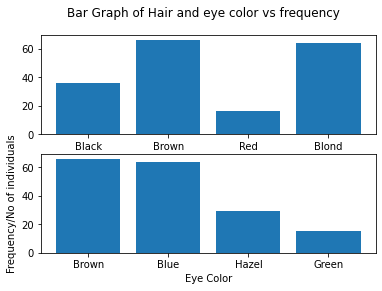

In [3]:
#fig= plt.scatter(x,y)
# plt.bar(x)
fig,ax=plt.subplots(2,1,num=1,sharey=True)
# ax.plot(testa,testb)
# plt.show()
ax[0].bar(x,y)
# ax[0].set_ylabel('Frequency/No of individuals')
ax[0].set_xlabel('Hair Color')
ax[1].bar(z,y)
ax[1].set_ylabel('Frequency/No of individuals')
ax[1].set_xlabel('Eye Color')
fig.suptitle('Bar Graph of Hair and eye color vs frequency')
plt.show()

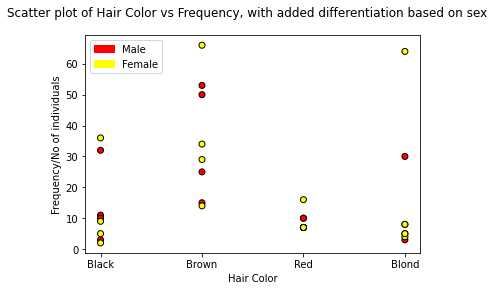

In [4]:
fig1,ax1=plt.subplots(1,1,num=2)
ax1.scatter(x,y,c=[colormap[ci] for ci in c ],edgecolor='black')
ax1.set_ylabel('Frequency/No of individuals')
ax1.set_xlabel('Hair Color')
fig1.suptitle('Scatter plot of Hair Color vs Frequency, with added differentiation based on sex')
ax1.legend(colormap)
red_patch = mpatches.Patch(color='red', label='Male')
yellow_patch = mpatches.Patch(color='yellow', label='Female')
ax1.legend(handles=[red_patch,yellow_patch])

In [5]:
dir=os.getcwd()
path=dir+"\gasindex\Gasoline Index in Europe 2022.xlsx"
print(path)
gasindex=pd.read_excel(path)
gasindex.head(50)
# fig2,ax2=plt.subplots(1,1,num=3)
gasprices=gasindex['Average price in june 2022, euro/liter']
countries=gasindex['Country']
# ax2.stem(country,price)
# fig2.suptitle('gas price of country')
gasprices.min()


C:\Users\davis\Documents\BSE\Brushup\pset5\gasindex\Gasoline Index in Europe 2022.xlsx


0.45

In [ ]:
# #run the following command in your shell
# # conda install -c conda-forge cartopy
f, axmap = plt.subplots(1,1,figsize=(10,10))
axmap = plt.axes(projection=ccrs.EuroPP())
axmap.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)
axmap.coastlines(resolution='10m')
axmap.add_feature(cartopy.feature.OCEAN,facecolor=("lightblue"))
axmap.add_feature(cartopy.feature.LAND)
axmap.gridlines()


# get country borders
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shpreader.natural_earth(resolution, category, name)
reader = shpreader.Reader(shpfilename)
country_iter=list(reader.records())
country_key=[x.attributes['NAME'] for x in country_iter]
geom=list(reader.geometries())
get_geom=dict(zip(country_key,geom))
# print(sorted(get_geom.keys()))

# kenya = [country for country in reader.records() if country.attributes["NAME_LONG"] == "Kenya"][0]


cmap = matplotlib.cm.get_cmap('plasma')
# # Normalise the prices to between 0 and 1 to extract the colour
price_norm = [(price-np.nanmin(gasprices))/(np.nanmax(gasprices) - np.nanmin(gasprices)) for price in gasprices]

for country, price in zip(countries, price_norm):
    # read the borders of the country in this loop
    poly = [get_geom[country] for co in reader.records() if co.attributes["NAME"] == country]

    # get the color for this country
    rgba = cmap(price)
    # plot the country on a map
    axmap.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=rgba, edgecolor='none', zorder=1)

#getting the colormap with original price values
norm = matplotlib.colors.Normalize(vmin=0.45, vmax=2.56) 
f.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), label='Gas prices (eur/L)', orientation='vertical', shrink=0.8)
plt.suptitle('Gas prices June 2022, euro/litre in gradient over a map of Europe')
plt.show()